# 컨텐츠 확보를 위한 EDA

In [1]:
import os 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(os.getcwd()+'/data_sales.csv')

data['time'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'], format='%m/%d/%Y %H:%M')
data['date'] = pd.to_datetime(data['time'].dt.date)
data = data.drop(columns = ['Date','Time']).rename(columns={'Total':'revenue'})
data.columns = [i.lower() for i in data.columns]

data = data.assign(revenue=lambda x: x['quantity']*x['unit price'],
                   weekday = lambda x: x['date'].dt.day_name())

In [3]:
data

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,revenue,payment,cogs,gross margin percentage,gross income,rating,time,date,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,522.83,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,2019-01-05,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,76.40,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,2019-03-08,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,324.31,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,2019-03-03,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,465.76,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,2019-01-27,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,604.17,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,2019-02-08,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,40.35,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29 13:46:00,2019-01-29,Tuesday
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,973.80,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02 17:16:00,2019-03-02,Saturday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,31.84,Cash,31.84,4.761905,1.5920,7.7,2019-02-09 13:22:00,2019-02-09,Saturday
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,65.82,Cash,65.82,4.761905,3.2910,4.1,2019-02-22 15:33:00,2019-02-22,Friday


In [4]:
for col in data.columns[data.dtypes == 'object']:
    if col != 'invoice id':
        print(f'> {col}:', data[col].unique())

> branch: ['A' 'C' 'B']
> city: ['Yangon' 'Naypyitaw' 'Mandalay']
> customer type: ['Member' 'Normal']
> gender: ['Female' 'Male']
> product line: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
> payment: ['Ewallet' 'Cash' 'Credit card']
> weekday: ['Saturday' 'Friday' 'Sunday' 'Monday' 'Thursday' 'Wednesday' 'Tuesday']


In [5]:
data.groupby(['branch']).agg({'time':[min,max]})

time                    
                       min                 max
branch                                        
A      2019-01-01 10:39:00 2019-03-30 17:04:00
B      2019-01-01 11:36:00 2019-03-30 17:58:00
C      2019-01-01 11:40:00 2019-03-30 20:37:00

In [6]:
data.groupby(['branch','product line'])['quantity'].sum().reset_index().\
    pivot_table(columns=['product line'], index=['branch'], values='quantity')

product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,
A,322,263,313,257,371,333
B,316,297,270,320,295,322
C,333,342,369,277,245,265


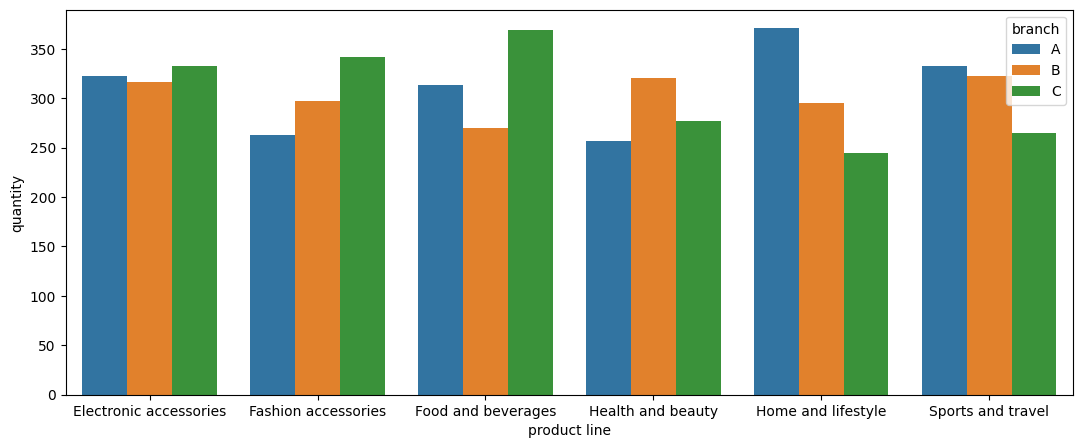

In [7]:
plt.figure(figsize=(13,5))
sns.barplot(x='product line', y= 'quantity', hue ='branch',
            data = data.groupby(['branch','product line'])['quantity'].sum().reset_index())
plt.show()

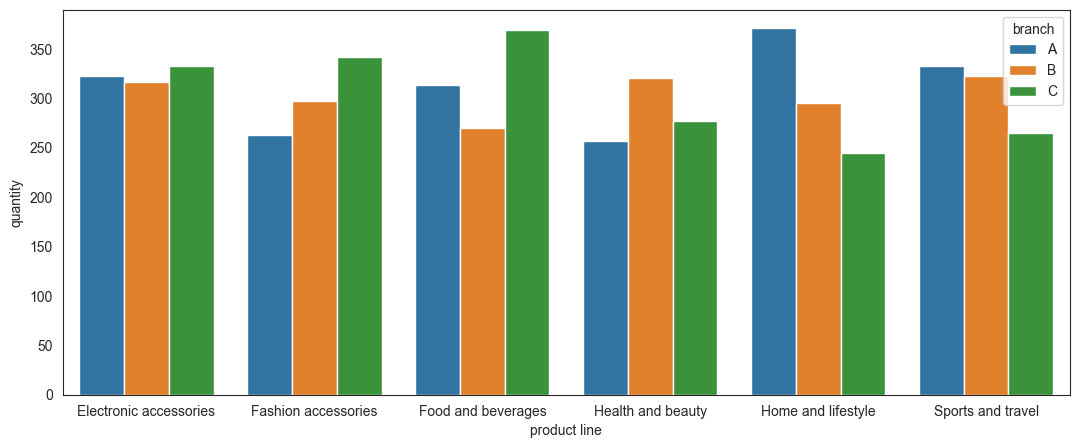

In [64]:
plt.figure(figsize=(13,5))
sns.barplot(x='product line', y= 'quantity', hue ='branch',
            data = data.groupby(['branch','product line'])['quantity'].sum().reset_index())
plt.show()

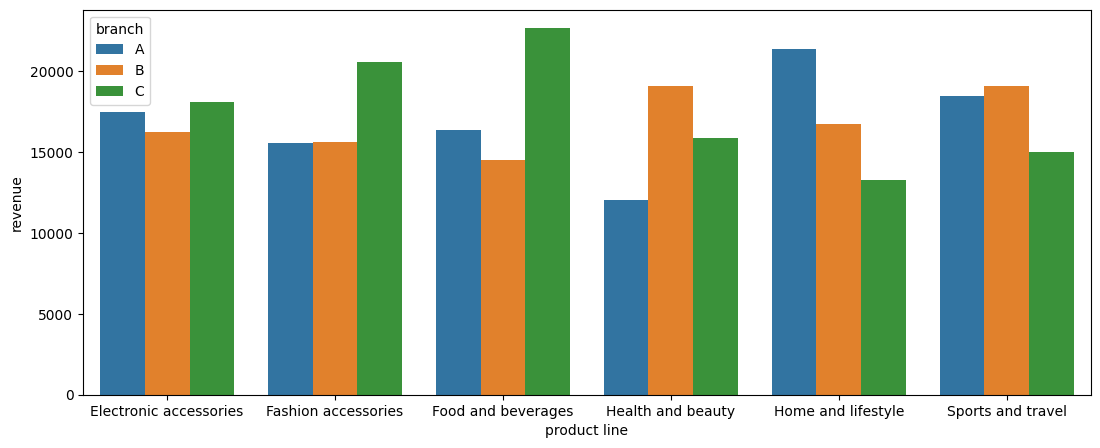

In [8]:
plt.figure(figsize=(13,5))
sns.barplot(x='product line', y= 'revenue', hue ='branch',
    data = data.groupby(['branch','product line'])['revenue'].sum().reset_index())
plt.show()

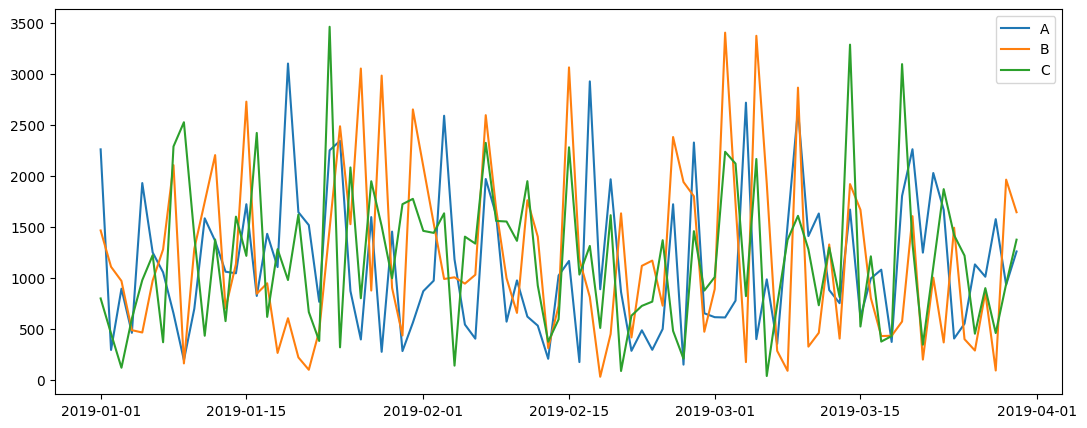

In [13]:
plt.figure(figsize=(13,5))
for branch, grp in \
    data.groupby(['date','branch'])['revenue'].sum().reset_index().groupby('branch'):
    plt.plot(grp['date'], grp['revenue'], label=branch)
plt.legend()
plt.show()

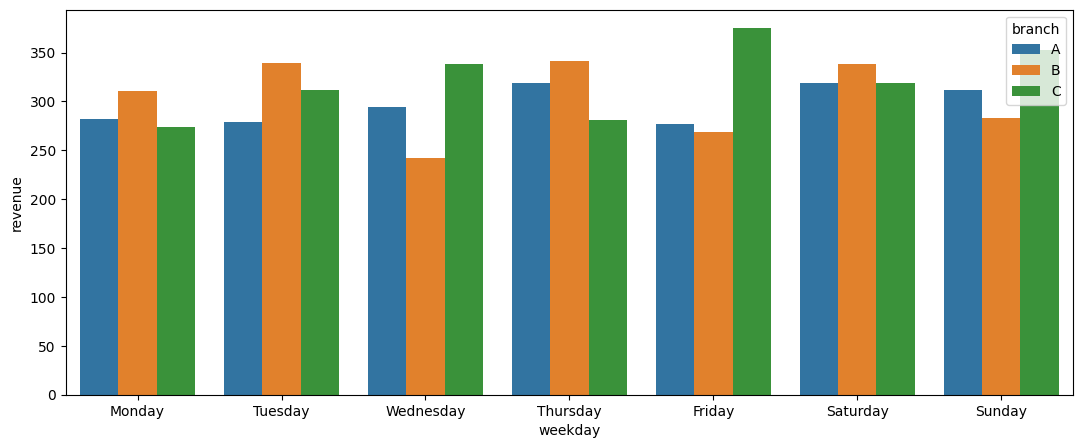

In [16]:
plt.figure(figsize=(13,5))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(x='weekday', y= 'revenue', hue ='branch',
    data = data.groupby(['branch','weekday'])['revenue'].mean().reset_index(),
    order=weekday_order)
plt.show()

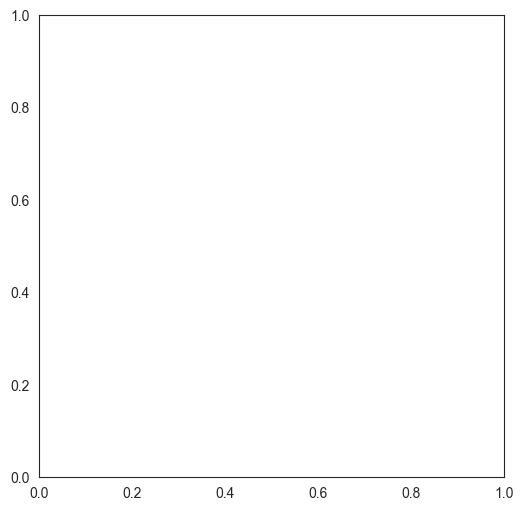

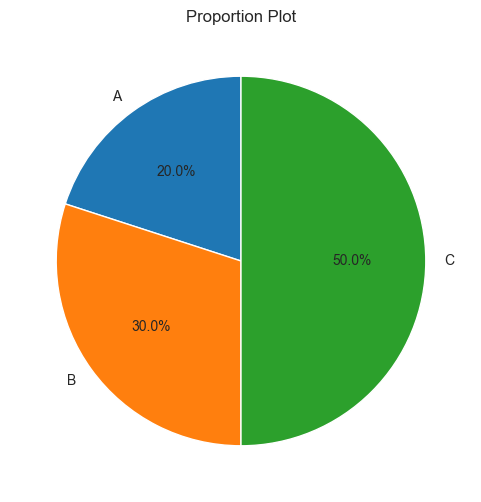

In [41]:
import matplotlib.pyplot as plt

# Create some example data
data = [20, 30, 50]

# Create the plot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(data, labels=['A', 'B', 'C'], autopct='%1.1f%%', startangle=90)
ax.set_title('Proportion Plot')

plt.show()


In [37]:
data.\
    assign(revenue=lambda x: x['quantity']*x['unit price']).\
        groupby(['branch','product line'])['revenue'].sum().reset_index()

,branch,product line,revenue
0,A,Electronic accessories,17444.87
1,A,Fashion accessories,15554.77
2,A,Food and beverages,16345.81
3,A,Health and beauty,11997.86
4,A,Home and lifestyle,21349.71
5,A,Sports and travel,18450.19
6,B,Electronic accessories,16239.47
7,B,Fashion accessories,15631.73
8,B,Food and beverages,14490.37
9,B,Health and beauty,19029.20
